In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('../Datasets/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [7]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VarunS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['content'] = df['title'] + " "+ df['text']
df['content'].head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: content, dtype: object

In [9]:
content = df['content']

### Using LabelEncoding 

In [10]:
le = LabelEncoder()
label = le.fit_transform(df['label'])
df['label'] = label
df['label']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int32

### Selecting Features and Target

In [11]:
X = df['content']
Y = df['label']

In [12]:
vector = TfidfVectorizer()

### Transforming String into Numerical form

In [13]:
X = vector.fit_transform(X)

In [14]:
print(X)

  (0, 20243)	0.014155656511894425
  (0, 18921)	0.009239149679446536
  (0, 9519)	0.014116381322605223
  (0, 2319)	0.02091617172019116
  (0, 29338)	0.020823501748051698
  (0, 10014)	0.023711116558904097
  (0, 35587)	0.017338254814480824
  (0, 11534)	0.015846825864723926
  (0, 7392)	0.008495458957410326
  (0, 54798)	0.016798284427221186
  (0, 41400)	0.010414149373689252
  (0, 15629)	0.017923636187876905
  (0, 42286)	0.018825971218985445
  (0, 60398)	0.009420815373814657
  (0, 66477)	0.023153957855833778
  (0, 57101)	0.014162237072362213
  (0, 34815)	0.008451074455220696
  (0, 37880)	0.008840753201921235
  (0, 53101)	0.01867434431067422
  (0, 62281)	0.02162699746804135
  (0, 49002)	0.02193167544171629
  (0, 12664)	0.01991664537766123
  (0, 6220)	0.011450426519200179
  (0, 57285)	0.01546597194033319
  (0, 10759)	0.025019483231676083
  :	:
  (6334, 23922)	0.03515218175461745
  (6334, 57505)	0.013647564402926365
  (6334, 10125)	0.04101780703457752
  (6334, 7213)	0.007741653068382825
  (6334, 

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y, test_size=0.2, random_state=1)

### Building the model

In [16]:
model = LogisticRegression()

### Training the model

In [17]:
model.fit(X_train,Y_train)

LogisticRegression()

In [18]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 1])

### Checking the Accuracy Score

In [19]:
accuracy = accuracy_score(Y_test,predict)*100
accuracy

91.23914759273876

### Confusion Matrix

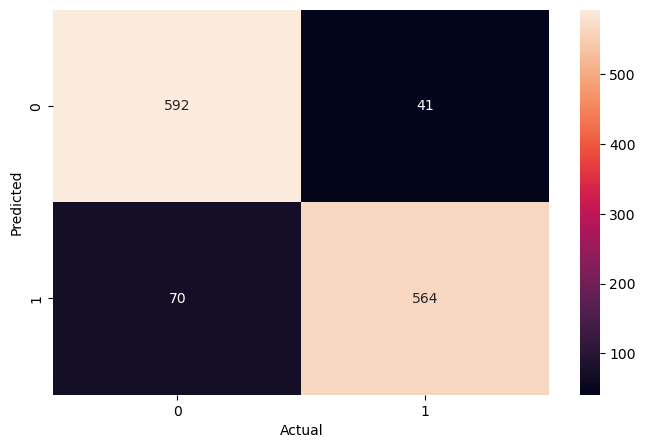

In [20]:
plt.figure(figsize=[8,5])
cm = confusion_matrix(Y_test,predict)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Building a Predictive System

In [21]:
random = np.random.randint(1,1266)
news = X_test[random]

prediction = model.predict(news)

if prediction[0]==1 : 
    print("The news is Real")
    
else :
    print("The news is Fake")

The news is Fake
